In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from random import randrange
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, random_split
import NeuralNets as NN
import pytorch_NN as PyNN

In [2]:

input_dim = 2
output_dim = 1
hidden_dim = 20
num_epochs = 10000
dataset_size = 10000
batch_size = 1000

model = PyNN.NeuralNetwork(input_dim, hidden_dim, output_dim) # Create model
optimizer = optim.Adam(model.parameters(),lr=.001) #Define optimizer

## Define functions on which to do NLLS
x1_train, x2_train = PyNN.functions.generate_data([-5,5],[-5,5],dataset_size)
fcn = PyNN.functions.rosenbrock_noisy
y_train = torch.from_numpy(fcn(x1_train,x2_train)).to(torch.float32).unsqueeze(1)

#y_train = torch.from_numpy(np.array(np.cos(x1_train)+np.sin(x2_train))).to(torch.float32).unsqueeze(1)
x_train = torch.from_numpy(np.array([x1_train,x2_train]).transpose()).to(torch.float32)
data_set  = PyNN.CustomDataset(x_train,y_train)

## Split into train/test did not use this..
train,test = random_split(data_set,[int(1 * len(data_set)),int(0.0 * len(data_set))])
mse_list = np.zeros(num_epochs)
data_loader_train = DataLoader(dataset=train, batch_size=batch_size, shuffle=True)
data_loader_test = DataLoader(dataset=test, batch_size=batch_size, shuffle=False)



In [3]:
input_dim = 2
output_dim = 1
num_hidden_layers = 2
nodes_per_layer = 20
minibatch_sz = batch_size

test = NN.FullyConnected(input_dim,output_dim,nodes_per_layer,num_hidden_layers,minibatch_sz,activation_fcn="ReLU",optimizer="ADAM")  




In [4]:
#for param in model.parameters():
   # print(param)
MSE_history = []
mse_list_ = []

In [5]:
for epoch in range(0, num_epochs-1):
    for batch_x, batch_y in data_loader_train:
        
        ## Pytorch
        
        # Forward pass
        output = model(batch_x)
        
        # Compute the loss
        criterion = nn.MSELoss()
        loss = criterion(output, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Get MSE
        mse_list_.append(loss.item())

        # My implementation
        y_pred = test.forward(batch_x.numpy())
        test.gradient(y_pred,batch_y.numpy(),batch_x.numpy())
        test.updateWeights(lr=.001,alg="ADAM")
        
    
        
    
       
        MSE_history.append(np.mean((y_pred.flatten()-batch_y.numpy().flatten())**2))
      

In [ ]:
test.parameters["input_bias"]


array([[-0.21136812],
       [ 0.5761066 ],
       [ 0.50210156],
       [ 0.50338283],
       [ 0.44847293],
       [ 0.04042216],
       [ 0.08462497],
       [ 0.52715726],
       [-0.39983728],
       [ 0.47524172],
       [-0.38819474],
       [-0.45000058],
       [-0.38552176],
       [-0.08652246],
       [ 0.58035062],
       [ 0.59563324],
       [ 0.5033821 ],
       [-0.38985116],
       [-0.20763665],
       [ 0.486488  ]])

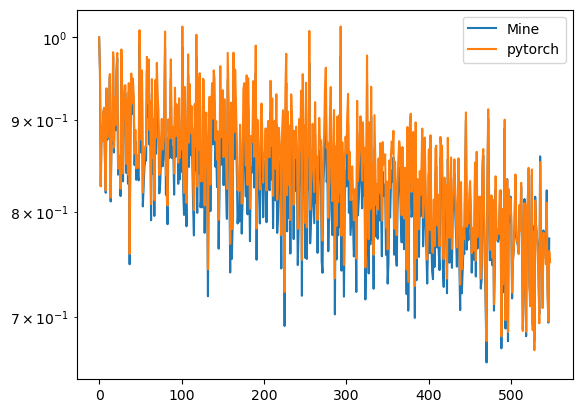

In [ ]:
plt.semilogy(MSE_history/MSE_history[0])
plt.semilogy(np.array(mse_list_)/mse_list_[0])
plt.legend(["Mine","pytorch"])

In [ ]:
np.linalg.norm(test.parameters["weights_out"])

12.925772001119832